In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
audi=pd.read_csv("audi.csv")

In [4]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<AxesSubplot:>

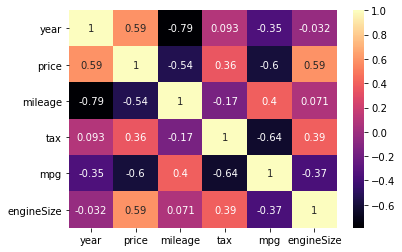

In [12]:
sns.heatmap(audi.corr(),annot=True,cmap="magma")

In [7]:
audi['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [10]:
def conv(text):
    if(text=='Diesel'):
        return 0
    elif(text=='Petrol'):
        return 1
    else:
        return 2

In [12]:
audi['FUEL']=audi['fuelType'].apply(conv)

In [14]:
audi['FUEL'].value_counts()

0    5577
1    5063
2      28
Name: FUEL, dtype: int64

In [18]:
audi.drop('fuelType',axis=1,inplace=True)

In [19]:
audi.head()

,model,year,price,transmission,mileage,tax,mpg,engineSize,FUEL
0,A1,2017,12500,Manual,15735,150,55.4,1.4,1
1,A6,2016,16500,Automatic,36203,20,64.2,2.0,0
2,A1,2016,11000,Manual,29946,30,55.4,1.4,1
3,A4,2017,16800,Automatic,25952,145,67.3,2.0,0
4,A3,2019,17300,Manual,1998,145,49.6,1.0,1


In [21]:
audi['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [22]:
def conve(text):
    if(text=='Manual'):
        return 0
    elif(text=='Semi-Auto'):
        return 1
    else:
        return 2

In [23]:
audi['TRANSMISSION']=audi["transmission"].apply(conve)

In [25]:
audi.drop('transmission',axis=1,inplace=True)

In [1]:
audi.to_csv("FullyCleant.csv")

NameError: name 'audi' is not defined

In [26]:
audi.head()

,model,year,price,mileage,tax,mpg,engineSize,FUEL,TRANSMISSION
0,A1,2017,12500,15735,150,55.4,1.4,1,0
1,A6,2016,16500,36203,20,64.2,2.0,0,2
2,A1,2016,11000,29946,30,55.4,1.4,1,0
3,A4,2017,16800,25952,145,67.3,2.0,0,2
4,A3,2019,17300,1998,145,49.6,1.0,1,0


In [32]:
audi.head()

,year,price,mileage,tax,mpg,engineSize,FUEL,TRANSMISSION
0,2017,12500,15735,150,55.4,1.4,1,0
1,2016,16500,36203,20,64.2,2.0,0,2
2,2016,11000,29946,30,55.4,1.4,1,0
3,2017,16800,25952,145,67.3,2.0,0,2
4,2019,17300,1998,145,49.6,1.0,1,0


In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X=audi.drop(['year','mileage','tax','mpg','engineSize','FUEL','TRANSMISSION'],axis=1)
y=audi['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
pred=model.predict(X_test)

In [46]:
from sklearn import metrics

In [47]:
print(metrics.mean_absolute_error(y_test,pred))

7.026723427362551e-12


In [48]:
print(metrics.mean_squared_error(y_test,pred))

9.690176365988793e-23


In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

9.843869343905775e-12


In [50]:
print(metrics.r2_score(y_test,pred))

1.0
